# Titanic: Machine Learning From Disaster

This is a Kaggle Competition, where we need to predict whether a passenger would or would not survive

### Overview

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBClassifier

## Exploratory Data Analysis

### Variable Notes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

### Methodology
- Use LabelEncoder to convert all strings to int
- Try to find feature importance using ExtraTreesClassifier


In [2]:
train_data = pd.read_csv("../Data/titanic/train.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data = train_data.astype({'Name': str, 'Sex': str, 'Ticket': str, 'Cabin': str, 'Embarked': str})

le = LabelEncoder()
le = le.fit(train_data['Name'])
train_data['t_Name'] = le.transform(train_data['Name'])

e = le.fit(train_data['Sex'])
train_data['t_Sex'] = le.transform(train_data['Sex'])

le = le.fit(train_data['Ticket'])
train_data['t_Ticket'] = le.transform(train_data['Ticket'])

le = le.fit(train_data['Cabin'])
train_data['t_Cabin'] = le.transform(train_data['Cabin'])

e = le.fit(train_data['Embarked'])
train_data['t_Embarked'] = le.transform(train_data['Embarked'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[0.09153999 0.08207882 0.09440992 0.27324995 0.11499222 0.03745067
 0.03275953 0.1080308  0.07849487 0.06338149 0.02361173]


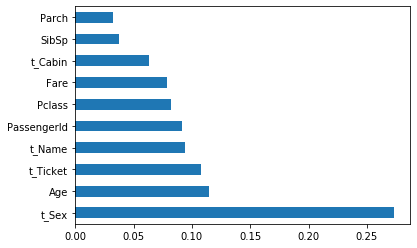

In [5]:
train_data = train_data.dropna()
X = train_data[['PassengerId', 'Pclass', 't_Name', 't_Sex', 'Age', 'SibSp', 'Parch', 't_Ticket', 'Fare', 't_Cabin', 't_Embarked']]  #independent columns
y = train_data[['Survived']]
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

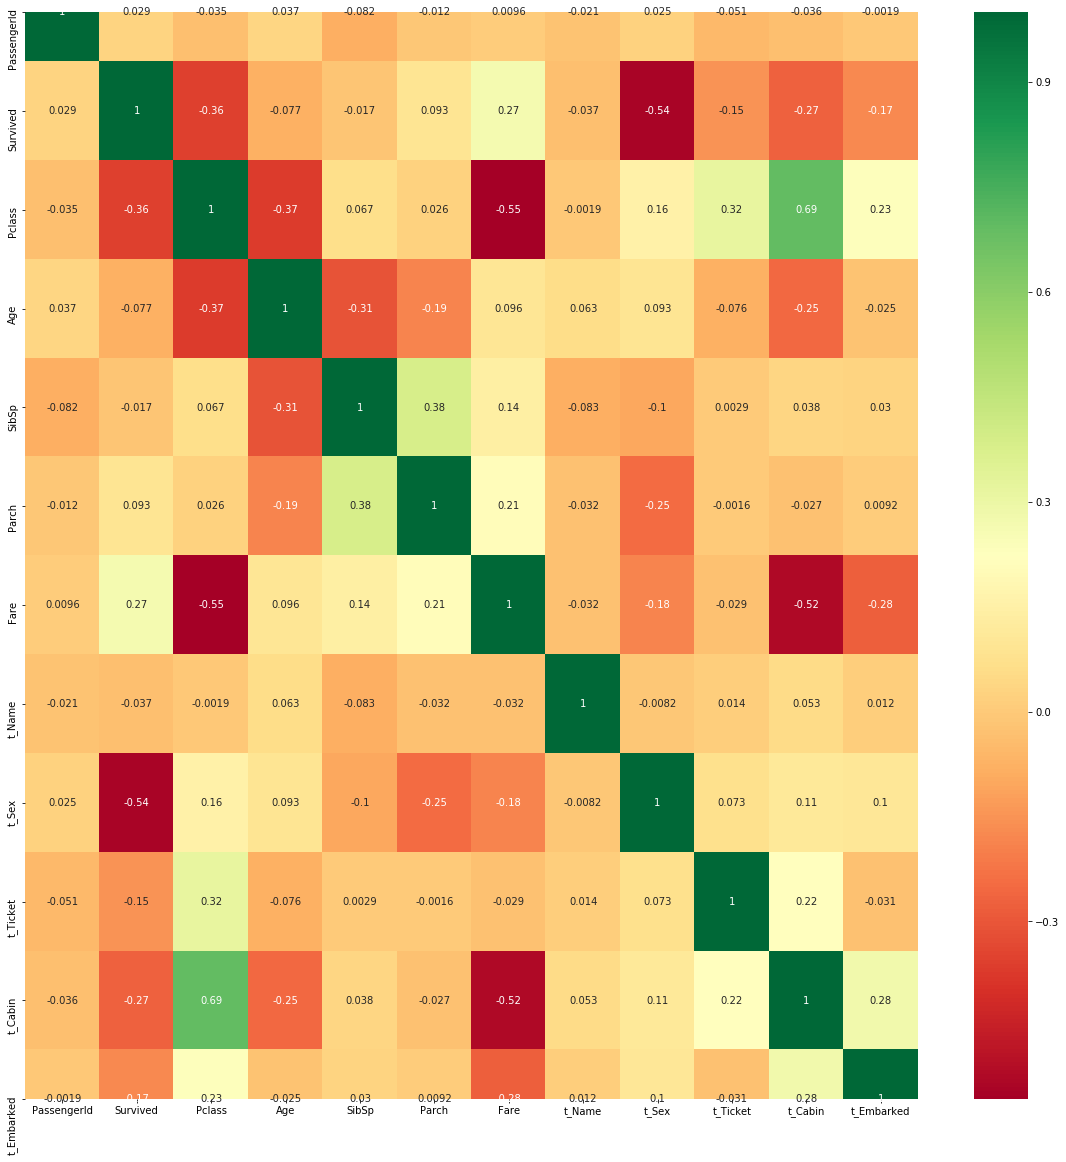

In [6]:
train_data = train_data.dropna()
X = train_data[['PassengerId', 'Pclass', 't_Name', 't_Sex', 'Age', 'SibSp', 'Parch', 't_Ticket', 'Fare', 't_Cabin', 't_Embarked']]  #independent columns
y = train_data[['Survived']]
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [7]:
dt.show(train_data)

In [12]:
classifiers = [KNeighborsClassifier(3), SVC(gamma=2, C=1), GaussianProcessClassifier(1.0 * RBF(1.0)), LogisticRegression()]

In [15]:
X = train_data[['t_Sex', 'Age', 't_Ticket', 'Fare', 't_Cabin', 't_Embarked']]  #independent columns
y = train_data[['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=1110)
clf = classifiers[3]
clf.fit(X_train, y_train.values.ravel())
score = clf.score(X_test, y_test.values.ravel())
print(score)

0.7966101694915254


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



# Use Model to Predict on our Test Cases

In [17]:
test_cases = pd.read_csv('../Data/titanic/test.csv')

In [18]:
test_cases

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
test_cases = test_cases.astype({'Name': str, 'Sex': str, 'Ticket': str, 'Cabin': str, 'Embarked': str})

le = LabelEncoder()
le = le.fit(test_cases['Name'])
test_cases['t_Name'] = le.transform(test_cases['Name'])

e = le.fit(test_cases['Sex'])
test_cases['t_Sex'] = le.transform(test_cases['Sex'])

le = le.fit(test_cases['Ticket'])
test_cases['t_Ticket'] = le.transform(test_cases['Ticket'])

le = le.fit(test_cases['Cabin'])
test_cases['t_Cabin'] = le.transform(test_cases['Cabin'])

e = le.fit(test_cases['Embarked'])
test_cases['t_Embarked'] = le.transform(test_cases['Embarked'])

## Some Passengers have no Age/Fare entry, so to account for that we'll fill the average age/fare. This won't give 100% accurate results but it should still be reasonable for our purposes. 

In [25]:
dt.show(test_cases, ignore_duplicate=True)

In [27]:
values = {'Age': test_cases['Age'].mean(), 'Fare': test_cases['Fare'].mean()}
test_cases = test_cases.fillna(value=values)

In [35]:
X_test = test_cases[['t_Sex', 'Age', 't_Ticket', 'Fare', 't_Cabin', 't_Embarked']] 
predictions = clf.predict(X_test)

In [36]:
test_cases['Survived'] = predictions

In [37]:
dt.show(test_cases)

# Creating submission with current accuracy of 79.7%

In [38]:
test_cases[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)

# Submitted score of 75.598%